In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
import yfinance as yf
from matplotlib import dates as dt
from numpy import linalg

# Sentiment Data

In [57]:
df_sentiment = pd.read_csv("../data/sentiment_daily_data.csv")
df_sentiment.index = pd.DatetimeIndex(df_sentiment["release_date"]).to_period("D")
df_sentiment = df_sentiment.drop('release_date', axis = 1)
df_sentiment

,AAPL_daily,AAPL_diff,AMZN_daily,AMZN_diff,BAC_daily,BAC_diff,CVX_daily,CVX_diff,HD_daily,HD_diff,...,PFE_daily,PFE_diff,PG_daily,PG_diff,TSLA_daily,TSLA_diff,WMT_daily,WMT_diff,XOM_daily,XOM_diff
release_date,,,,,,,,,,,,,,,,,,,,,
2014-01-04,0.9747,-0.9876,0.9870,0.0,1.8862,0.0000,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9595,0.0000
2014-01-05,2.6382,1.6635,0.9870,0.0,0.9956,-0.8906,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9977,0.0382
2014-01-06,2.6382,0.0000,0.9870,0.0,0.9956,0.0000,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,-0.0010
2014-01-07,-0.2695,-2.9077,0.9870,0.0,2.9495,1.9539,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,0.0000
2014-01-08,-0.2695,0.0000,0.9870,0.0,0.9862,-1.9633,1.9993,0.0000,0.9900,0.0,...,0.9881,0.0000,0.9866,0.0,0.8641,0.0,0.9135,0.0000,0.9967,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-09,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,1.9594,0.7939,0.9975,0.0,...,1.9891,0.0000,-0.9581,0.0,20.7979,0.0,0.3612,-0.6384,-0.9922,0.0000
2020-02-10,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,1.9594,0.0000,0.9975,0.0,...,1.9891,0.0000,-0.9581,0.0,20.7979,0.0,0.3612,0.0000,-0.5306,0.4616
2020-02-11,33.1780,0.0000,4.5365,0.0,4.1556,0.0000,0.0732,-1.8862,0.9975,0.0,...,1.5383,-0.4508,-0.9581,0.0,20.7979,0.0,0.3612,0.0000,1.9926,2.5232


# Stock Data

In [58]:
df_prices = pd.read_csv("../data/stock_data_daily_pct_change.csv")
df_prices.index = pd.DatetimeIndex(df_prices["Date"]).to_period("D")
df_prices = df_prices.drop('Date', axis = 1)
df_prices = df_prices.drop("Date.1", axis = 1)

# Drop columns with little amount of data (determined in "Sentiment Analysis.ipynb")
df_prices = df_prices.drop(["LLY", "NVDA", "MA", "UNH", "V"], axis = 1)
df_prices

,AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE
Date,,,,,,,,,,,,,,,
2011-01-04,0.005219,0.003931,0.003524,0.004288,0.001878,0.004695,0.014473,-0.020699,0.003849,-0.003698,0.008437,-0.018125,0.002779,0.008602,0.017534
2011-01-05,0.008180,-0.003204,0.018258,0.013026,0.005999,-0.002670,0.012229,-0.005950,-0.006573,-0.001747,-0.000631,-0.003172,-0.002310,0.005777,0.006671
2011-01-06,-0.000808,0.029286,-0.004138,-0.008324,0.039135,0.006426,-0.004922,-0.007245,-0.008270,-0.008202,-0.001580,-0.004051,-0.001698,0.013676,0.003865
2011-01-07,0.007161,-0.007634,-0.013158,-0.001991,0.012912,0.005453,-0.018885,-0.001745,0.002224,0.005514,-0.009650,-0.001162,-0.002937,0.007825,0.008801
2011-01-10,0.018833,-0.013287,0.010526,-0.004367,0.007436,-0.006086,-0.005500,0.002225,-0.006472,-0.008554,-0.007029,0.000291,-0.002171,-0.004016,-0.004362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.016319,0.000000,0.006007,0.003638,0.033605,0.005004,-0.000292,-0.001092,-0.010475,0.005431,0.002602,-0.008952,-0.003670,0.001747,0.002294
2019-12-24,0.000951,-0.000191,0.001422,-0.002114,0.014384,-0.003842,0.002770,-0.003642,0.004033,0.000083,-0.003483,0.006660,0.002562,-0.003270,-0.000763
2019-12-26,0.019840,0.008197,0.008518,0.044467,0.013380,0.001571,0.010612,0.005666,0.000084,0.002160,-0.000685,0.000680,0.000000,-0.001093,0.002291


# VAR model of merge


In [59]:
def var_model(df_sentiment: pd.DataFrame, df_prices: pd.DataFrame)-> tuple[VAR, pd.DataFrame]:
    """
    Make a VAR model for a specific stock

    Returns a tuple of the VAR model and a merged dataframe consisting of the prices and
    the sentiment.
    """
    merged_df = pd.merge(df_prices, df_sentiment, left_index= True, right_index = True)
    new_names = {df_sentiment.name: f"{df_prices.name}_sentiment", df_prices.name: f"{df_prices.name}_prices"}
    merged_df = merged_df.rename(new_names, axis=1)
    return VAR(merged_df), merged_df

In [60]:
var_models = []
merged_dfs = []
for ticker in df_prices.columns:
    var, merged_df = var_model(df_sentiment[f"{ticker}_diff"], df_prices[ticker])
    var_models.append(var)
    merged_dfs.append(merged_df)

In [61]:
results = []
for model in var_models:
    result = model.fit(maxlags=35, ic='aic')
    results.append(result)
    print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Dec, 2022
Time:                     12:00:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.27623
Nobs:                     1492.00    HQIC:                  -3.39675
Log likelihood:          -1592.73    FPE:                  0.0311691
AIC:                     -3.46833    Det(Omega_mle):       0.0300709
--------------------------------------------------------------------
Results for equation AAPL_prices
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.001052         0.000412            2.556           0.011
L1.AAPL_prices             0.018722         0.026095            0.717           0.473
L1.AAPL_sentiment         -0.00001

# Testing asssumptions

### Assumption 1
The mean of the residuals should be approximately zero:

In [62]:
for result in results:
    sentiment = result.names[0]
    price = result.names[1]
    print(f"{sentiment} resid. mean = ",result.resid[sentiment].mean())
    print(f"{price} resid. mean = ", result.resid[price].mean())

AAPL_prices resid. mean =  -4.185659861606237e-18
AAPL_sentiment resid. mean =  -2.6669164344883115e-16
MSFT_prices resid. mean =  1.752198863578991e-18
MSFT_sentiment resid. mean =  -1.3361448355461924e-16
BAC_prices resid. mean =  -2.0552827840792592e-18
BAC_sentiment resid. mean =  3.792089316931822e-17
AMZN_prices resid. mean =  7.792340747703305e-19
AMZN_sentiment resid. mean =  -1.4628821030355003e-15
TSLA_prices resid. mean =  -5.547416845228963e-19
TSLA_sentiment resid. mean =  -2.0828701114886347e-16
XOM_prices resid. mean =  8.604228440844963e-19
XOM_sentiment resid. mean =  1.9895196601282806e-16
JPM_prices resid. mean =  6.79558563540548e-19
JPM_sentiment resid. mean =  -1.3017938196803967e-17
KO_prices resid. mean =  -1.0012031284194799e-18
KO_sentiment resid. mean =  1.1391466705572748e-16
WMT_prices resid. mean =  1.5173048003210473e-18
WMT_sentiment resid. mean =  1.0421293457814803e-16
CVX_prices resid. mean =  -6.312304822283499e-19
CVX_sentiment resid. mean =  -9.267

### Assumption 2

Covariance matrix of the errors should be positive semi definite:

In [63]:
for result in results:
    cov_matrix = result.resid_corr
    print(linalg.eigvals(cov_matrix))

[1.04662188 0.95337812]
[1.00788712 0.99211288]
[0.92905974 1.07094026]
[1.05375535 0.94624465]
[0.96468457 1.03531543]
[1.04088217 0.95911783]
[1.00378321 0.99621679]
[1.01153468 0.98846532]
[1.09339304 0.90660696]
[1.01914048 0.98085952]
[1.03034024 0.96965976]
[0.92115693 1.07884307]
[1.03233171 0.96766829]
[0.99149771 1.00850229]
[1.06631872 0.93368128]


### Assumption 3

Residuals should be uncorrelated:

In [64]:
for result in results:
    print(f"{result.names[0]} and {result.names[1]}:")
    print(result.test_whiteness(result.k_ar+1).summary(), "\n \n")

AAPL_prices and AAPL_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 14 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.813          9.488   0.590  4
---------------------------------------- 
 

MSFT_prices and MSFT_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 17 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         9.042          9.488   0.060  4
---------------------------------------- 
 

BAC_prices and BAC_sentiment:
Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 7 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         2.642       

### Assumption 4

# Forecasting

In [65]:
def forecast(results, merged_df):

    # get ticker name by removing "_prices"
    ticker = results.names[0][:-7]

    # last date in train set: 2019-12-30
    # downloading testset
    test_prices = pd.DataFrame(yf.Ticker(ticker).history(start = '2019-12-30', end = '2020-1-20')['Close'])
    forecast_df = pd.DataFrame(results.forecast(np.array(merged_df), 14))
    forecast_df.columns = ['price', 'sentiment']

    # recall AAPL stock prive is percent change, and APPL setiment is differences
    # undoing the differencing of APPL_sentiment by taking the cumsum
    initial_value = test_prices.iloc[0,:]
    forecast_df["sentiment"].cumsum(axis = 0)
    forecasted_prices = forecast_df.assign(price=forecast_df.price.pct_change(-1)+initial_value[0])
    forecasted_prices['price'].index = test_prices.index

    return forecasted_prices["price"], test_prices

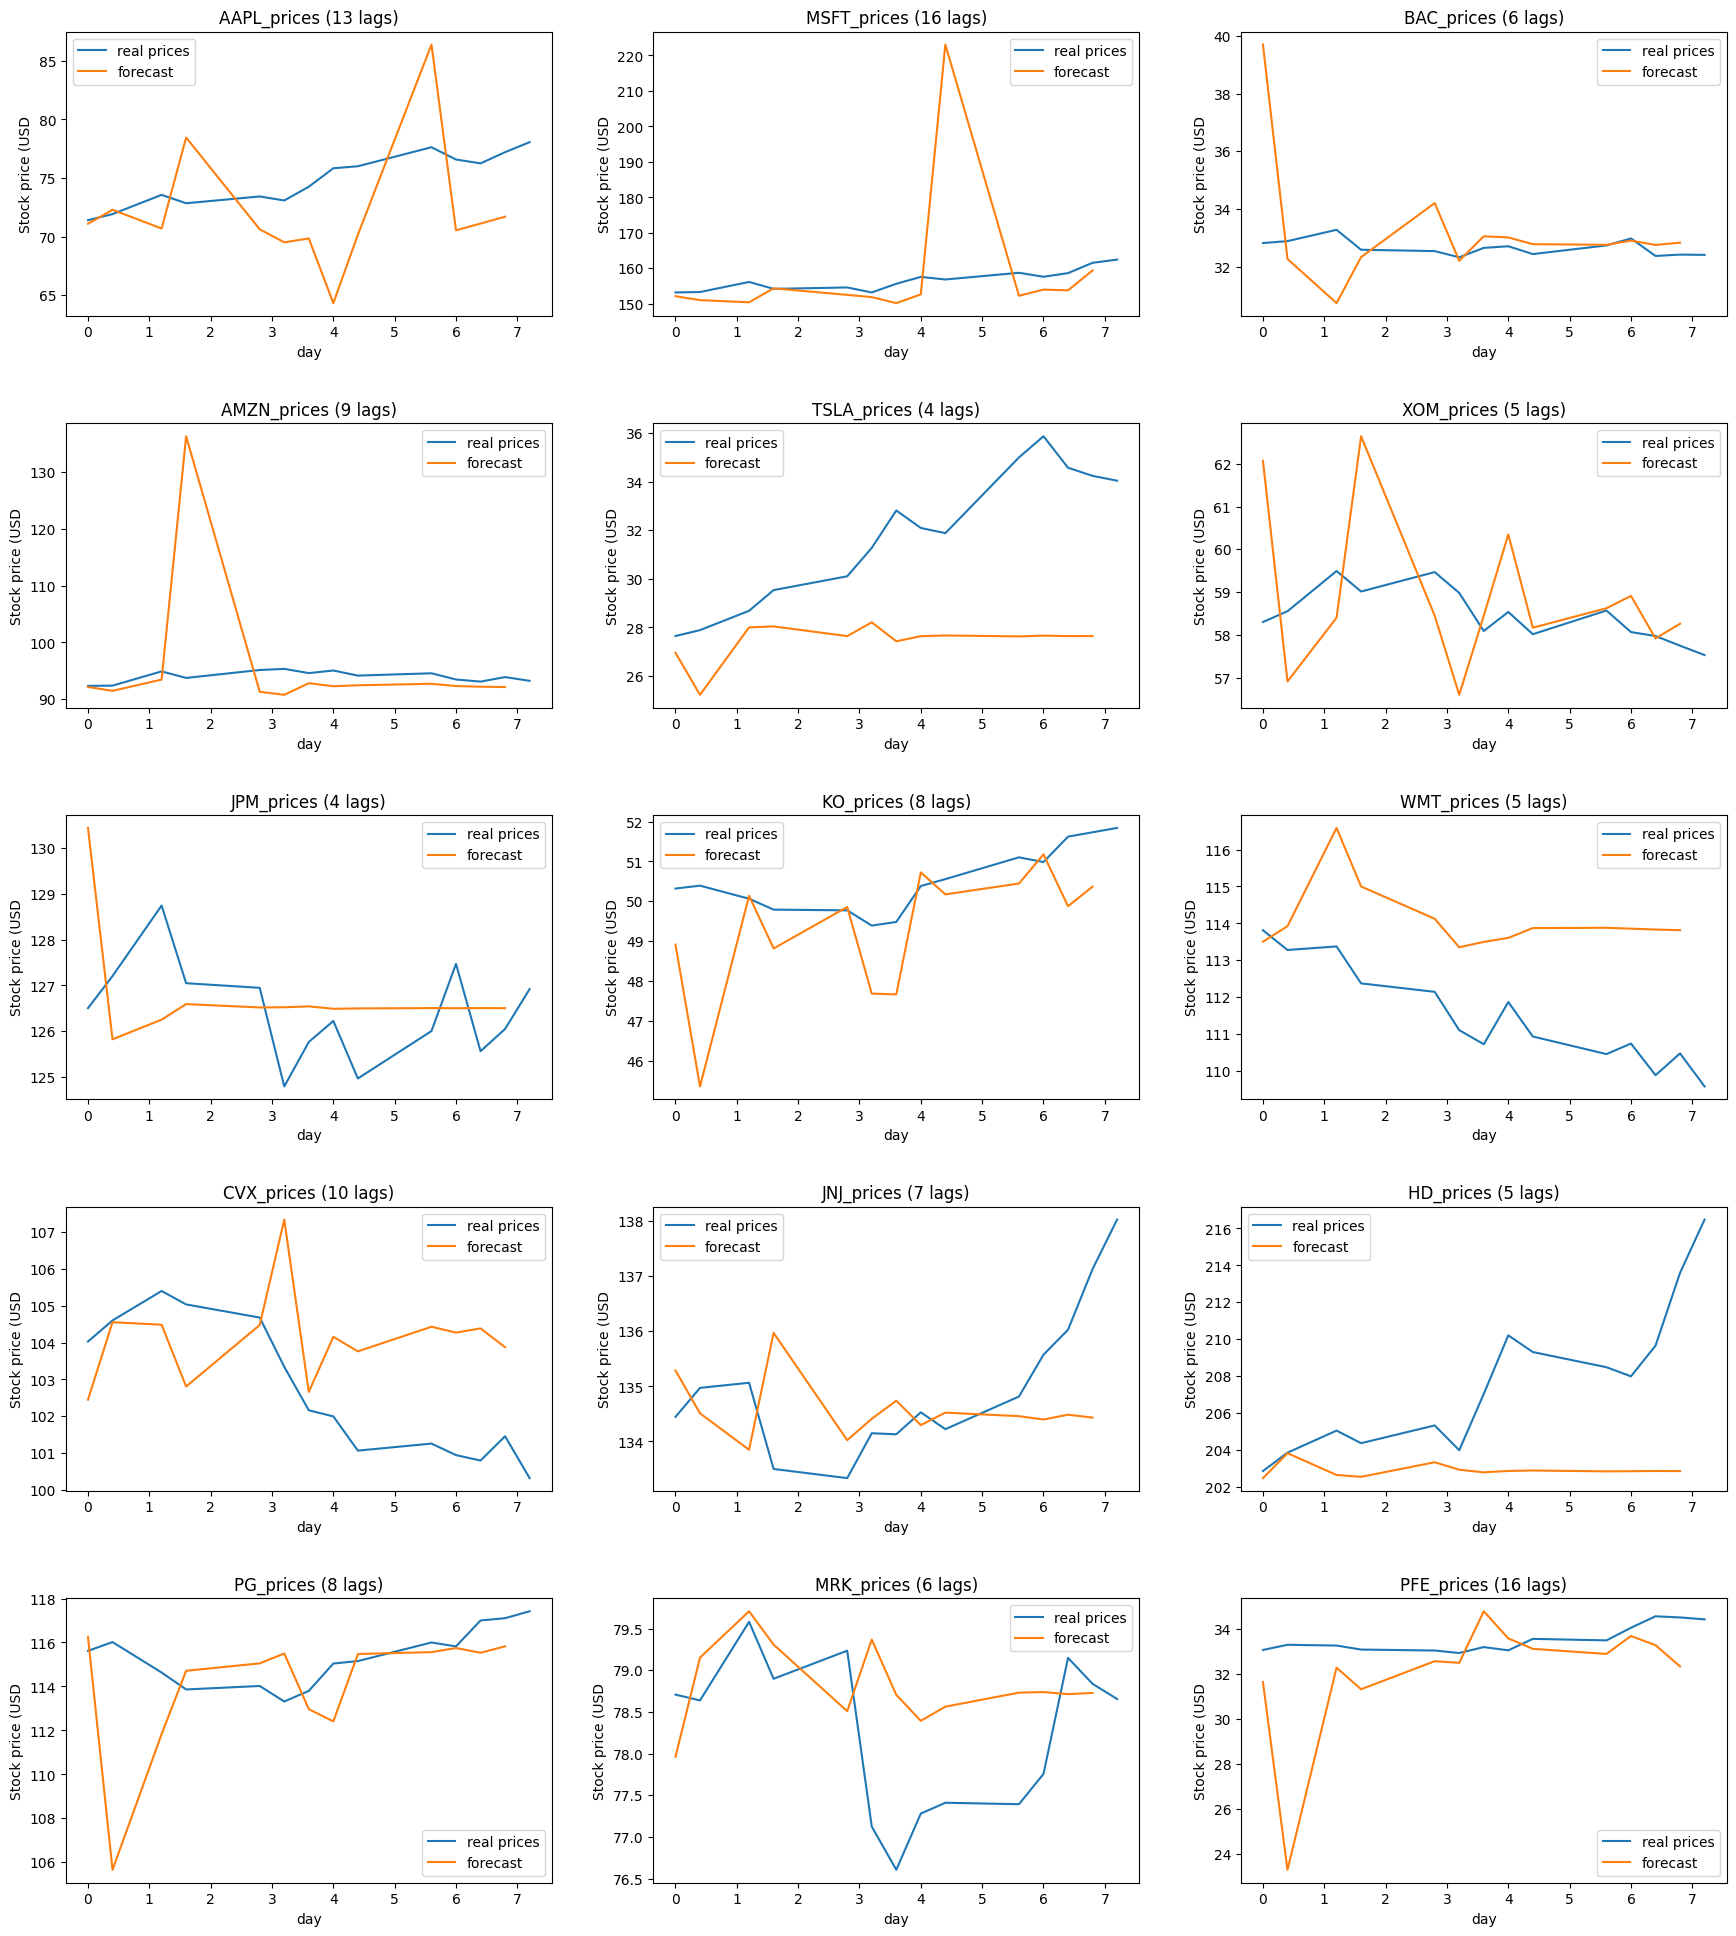

In [66]:
fig = plt.figure(figsize = (18, 20))
i = 0
for result, merged_df in zip(results, merged_dfs):
    i+=1
    forecasted, real_prices = forecast(result, merged_df)
    plt.subplot(5, 3, i)
    plt.title(f"{result.names[0]} ({result.k_ar} lags)" )
    plt.xlabel('day')
    plt.ylabel('Stock price (USD')
    days = dt.date2num(real_prices.index)
    days = [(t-days[0])/2.5 for t in days]
    plt.plot(days, real_prices["Close"], label='real prices')
    plt.plot(days, forecasted, label='forecast')
    plt.legend()
fig.tight_layout(pad = 3)
plt.show()

In [67]:
lags = [result.k_ar for result in results]
np.mean(lags)

8.133333333333333

In [ ]:
def create_sliding_windows_of_timeseries(df, window_size):
    # Create sliding windows of timeseries for each variable in the dataframe
    # create sliding windows of timeseries per stock:
    list_of_windows_per_variable = []
    for variable in df.columns:
        variable_timeseries = df[str(variable)]
        # Define the window size
        window_size = 20

        # Initialize the list of windows
        windows = []

        # Iterate over the time series
        for i in np.arange(len(variable_timeseries.index) - window_size + 1, step = window_size):
            # Take the last `window_size` elements of the time series
            # windows are non overlapping, i.e. the first window is from index 0-20, the next from 20-40 etc. 
            # instead of first window being index 0-20, second window being 1-21, etc.
            current_window = variable_timeseries[i:i+window_size]
            # Add the current window to the list of windows
        windows.append(np.array(current_window))
    list_of_windows_per_variable.append(windows)
    return list_of_windows_per_variable